In [3]:
#If not installed already go ahead and do it
# pip install yfinance

### 1. Import relevant libraries

In [61]:
import yfinance as yf
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier

# import os

In [11]:
sp500 = yf.Ticker("^GSPC") #^GSPC is the ticker symbol for the index.

In [22]:
sp500 = sp500.history(period = 'max')
sp500.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
1927-12-30 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,0.0,0.0
1928-01-03 00:00:00-05:00,17.760000,17.760000,17.760000,17.760000,0,0.0,0.0
1928-01-04 00:00:00-05:00,17.719999,17.719999,17.719999,17.719999,0,0.0,0.0
1928-01-05 00:00:00-05:00,17.549999,17.549999,17.549999,17.549999,0,0.0,0.0
1928-01-06 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,0.0,0.0


In [35]:
# sp500.index 
sp500.index[0] #1927-12-30
# sp500.index[-1] #Today

Timestamp('1927-12-30 00:00:00-0500', tz='America/New_York')

<AxesSubplot:xlabel='Date'>

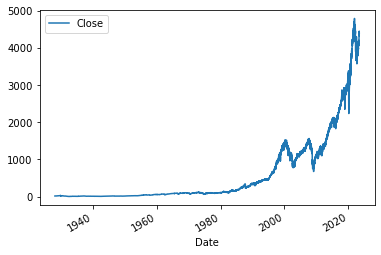

In [24]:
sp500.plot.line(y="Close", use_index=True)

In [42]:
#Lowering all column names 
# sp500.columns = sp500.columns.str.lower()
# sp500
#Looks like the Date is in the index so lowering that too.
sp500.index.name = sp500.index.name.lower()
sp500

,open,high,low,close,volume,dividends,stock splits
date,,,,,,,
1927-12-30 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,0.0,0.0
1928-01-03 00:00:00-05:00,17.760000,17.760000,17.760000,17.760000,0,0.0,0.0
1928-01-04 00:00:00-05:00,17.719999,17.719999,17.719999,17.719999,0,0.0,0.0
1928-01-05 00:00:00-05:00,17.549999,17.549999,17.549999,17.549999,0,0.0,0.0
1928-01-06 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,0.0,0.0
...,...,...,...,...,...,...,...
2023-06-30 00:00:00-04:00,4422.439941,4458.479980,4422.439941,4450.379883,3923450000,0.0,0.0
2023-07-03 00:00:00-04:00,4450.479980,4456.459961,4442.290039,4455.589844,2034280000,0.0,0.0
2023-07-05 00:00:00-04:00,4442.040039,4454.060059,4436.609863,4446.819824,3482620000,0.0,0.0


Going to be only looking at the index in this case so will remove dividends and stock splits
These would obviously greatly alter the returns/price of stocks individually... 

In [45]:
#Deleting Dividends & Stock Splits
del sp500["dividends"]
del sp500["stock splits"]

Setting Target: Will it go up or down.
Objective: On days that the stock goes up or down can we predict it?

In [46]:
#Shifting the next days closing price into a new column called tomorrow.
#This will be used as the target. So going to use the other variables to predict the value in tomorrow furhter in..
sp500['tomorrow'] = sp500["close"].shift(-1) 
sp500

,open,high,low,close,volume,tomorrow
date,,,,,,
1927-12-30 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,17.760000
1928-01-03 00:00:00-05:00,17.760000,17.760000,17.760000,17.760000,0,17.719999
1928-01-04 00:00:00-05:00,17.719999,17.719999,17.719999,17.719999,0,17.549999
1928-01-05 00:00:00-05:00,17.549999,17.549999,17.549999,17.549999,0,17.660000
1928-01-06 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,17.500000
...,...,...,...,...,...,...
2023-06-30 00:00:00-04:00,4422.439941,4458.479980,4422.439941,4450.379883,3923450000,4455.589844
2023-07-03 00:00:00-04:00,4450.479980,4456.459961,4442.290039,4455.589844,2034280000,4446.819824
2023-07-05 00:00:00-04:00,4442.040039,4454.060059,4436.609863,4446.819824,3482620000,4411.589844


In [47]:
#Setting up the target now 
#Will return a boolean displaying whether tomorrows close was greater than todays close.
sp500['target'] = (sp500['tomorrow'] > sp500["close"]).astype(int)
sp500

,open,high,low,close,volume,tomorrow,target
date,,,,,,,
1927-12-30 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,17.760000,1
1928-01-03 00:00:00-05:00,17.760000,17.760000,17.760000,17.760000,0,17.719999,0
1928-01-04 00:00:00-05:00,17.719999,17.719999,17.719999,17.719999,0,17.549999,0
1928-01-05 00:00:00-05:00,17.549999,17.549999,17.549999,17.549999,0,17.660000,1
1928-01-06 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,17.500000,0
...,...,...,...,...,...,...,...
2023-06-30 00:00:00-04:00,4422.439941,4458.479980,4422.439941,4450.379883,3923450000,4455.589844,1
2023-07-03 00:00:00-04:00,4450.479980,4456.459961,4442.290039,4455.589844,2034280000,4446.819824,0
2023-07-05 00:00:00-04:00,4442.040039,4454.060059,4436.609863,4446.819824,3482620000,4411.589844,0


In [48]:
#As the market has significantly shifted since 1927 best to figure out a cut off date and remove all dates prior
#to a certain date...
sp500 = sp500.loc['1990-01-01':].copy() #.copy used to remove pandas subsetting error...
sp500

,open,high,low,close,volume,tomorrow,target
date,,,,,,,
1990-01-02 00:00:00-05:00,353.399994,359.690002,351.980011,359.690002,162070000,358.760010,0
1990-01-03 00:00:00-05:00,359.690002,360.589996,357.890015,358.760010,192330000,355.670013,0
1990-01-04 00:00:00-05:00,358.760010,358.760010,352.890015,355.670013,177000000,352.200012,0
1990-01-05 00:00:00-05:00,355.670013,355.670013,351.350006,352.200012,158530000,353.790009,1
1990-01-08 00:00:00-05:00,352.200012,354.239990,350.540009,353.790009,140110000,349.619995,0
...,...,...,...,...,...,...,...
2023-06-30 00:00:00-04:00,4422.439941,4458.479980,4422.439941,4450.379883,3923450000,4455.589844,1
2023-07-03 00:00:00-04:00,4450.479980,4456.459961,4442.290039,4455.589844,2034280000,4446.819824,0
2023-07-05 00:00:00-04:00,4442.040039,4454.060059,4436.609863,4446.819824,3482620000,4411.589844,0


In [58]:
# Should have done this earlier but remove the time information in the date column
sp500.index = sp500.index.date
sp500
sp500.index.name = 'date'
sp500

,open,high,low,close,volume,tomorrow,target
date,,,,,,,
1990-01-02,353.399994,359.690002,351.980011,359.690002,162070000,358.760010,0
1990-01-03,359.690002,360.589996,357.890015,358.760010,192330000,355.670013,0
1990-01-04,358.760010,358.760010,352.890015,355.670013,177000000,352.200012,0
1990-01-05,355.670013,355.670013,351.350006,352.200012,158530000,353.790009,1
1990-01-08,352.200012,354.239990,350.540009,353.790009,140110000,349.619995,0
...,...,...,...,...,...,...,...
2023-06-30,4422.439941,4458.479980,4422.439941,4450.379883,3923450000,4455.589844,1
2023-07-03,4450.479980,4456.459961,4442.290039,4455.589844,2034280000,4446.819824,0
2023-07-05,4442.040039,4454.060059,4436.609863,4446.819824,3482620000,4411.589844,0


### Modelling

In [89]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators = 100,
                              min_samples_split = 100,
                              random_state = 2) #Keep the randomseed the same)
#Using cross-validation would use future data to predict todays data causing data leakage. i.e., not using it...
train = sp500.iloc[:-100] #All rows except the last 100
test = sp500.iloc[-100:] #Last 100 rows
                               
predictors = ["close", "volume", "open", "high", "low"]
model.fit(train[predictors], train['target'])

RandomForestClassifier(min_samples_split=100, random_state=2)

In [90]:
from sklearn.metrics import precision_score

preds = model.predict(test[predictors])

In [91]:
#Alter to pandas series using the original index for a better view...
preds = pd.Series(preds, index=test.index)
# preds

date
2023-02-13    0
2023-02-14    0
2023-02-15    0
2023-02-16    1
2023-02-17    0
             ..
2023-06-30    1
2023-07-03    0
2023-07-05    1
2023-07-06    1
2023-07-07    1
Length: 100, dtype: int64

In [92]:
#Model is correct 55.8% of the time. 
precision_score(test["target"], preds)

0.5957446808510638

In [100]:
#Plotting the predictions
combined = pd.concat([test['target'], preds], axis=1)

<AxesSubplot:xlabel='date'>

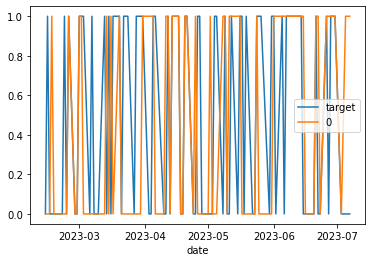

In [101]:
combined.plot()

In [95]:
#Backtesting
def predict(train, test, predictors, model):
    model.fit(train[predictors], train['target'])
    preds = model.predict(test[predictors])
    preds = pd.Series(preds, index=test.index, name = "predictions")
    combined = pd.concat([test['target'], preds], axis=1)
    return combined

In [113]:
#Every trading year has about 250 trading days so using about 10 years to initially train the model
#Training the model for ~1 year at a time using step.
#So getting the first 10 years initially and predicting the next year
#then the 11th year and predicting the 12th and so on.
def backtest(data, model, predictors, start=2500, step=250):
    all_predictions = []
    
    for i in range(start, data.shape[0], step):
        train = data.iloc[0:i].copy()
        test = data.iloc[i:(i+step)].copy()
        predictions = predict(train, test, predictors, model)
        all_predictions.append(predictions)
    return pd.concat(all_predictions)

In [114]:
predictions = backtest(sp500, model, predictors)

In [115]:
predictions['predictions'].value_counts() #Check how many days we predicted it'd go up (1) vs down (0)

0    3408
1    2535
Name: predictions, dtype: int64

In [116]:
precision_score(predictions["target"], predictions["predictions"])

#Kinda weird this performed worse than the original... probability...

0.5282051282051282

In [117]:
predictions['target'].value_counts()/predictions.shape[0]

1    0.533737
0    0.466263
Name: target, dtype: float64

### Adding additional predictors

In [ ]:
# Horizons to see rolling means. the last 2 days, week, 3 months, year and 4 years
horizon = [2,5,60,250,1000]

#Creating rolling horizon

for horizon in horizons:
    rolling_averages = sp500.rolling(horizon).mean()
    
    ratio_column = f"close_ratio_{horizon}"
    sp500[ratio_column] = sp500["close"] / rolling_averages["close"]
    
    trend_column = f"trend_{horizon}"
    sp500[trend_column] = sp500.shift(1).rolling(horizon).sum()["target"]
